<a href="https://colab.research.google.com/github/Ad603-tech/Self-driving-car/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

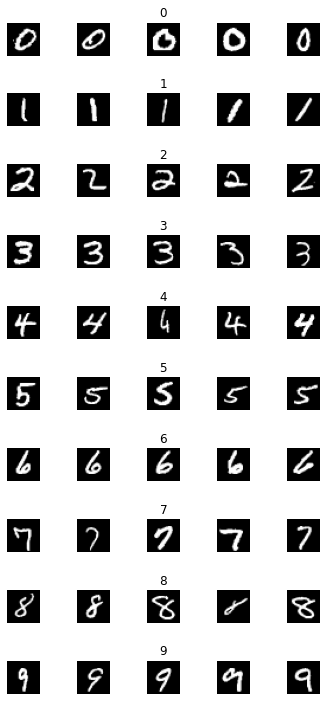

In [6]:

num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


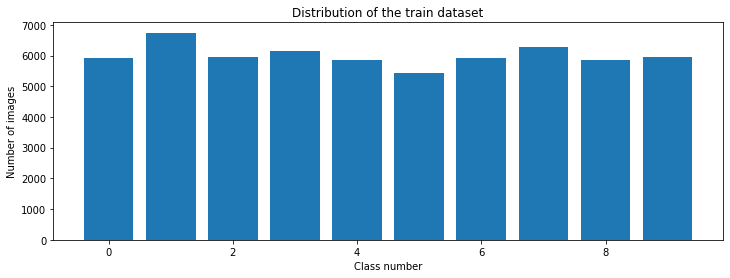

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
# define the leNet model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) # Conv2D(numof filter, dimensions of filter, kernel_size, activation_function)
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [12]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 13s 9ms/step - loss: 0.2643 - accuracy: 0.9178 - val_loss: 0.0588 - val_accuracy: 0.9825
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0752 - accuracy: 0.9769 - val_loss: 0.0457 - val_accuracy: 0.9855
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.0428 - val_accuracy: 0.9870
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0367 - val_accuracy: 0.9917
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0332 - val_accuracy: 0.9920
Epoch

Text(0.5, 0, 'epoch')

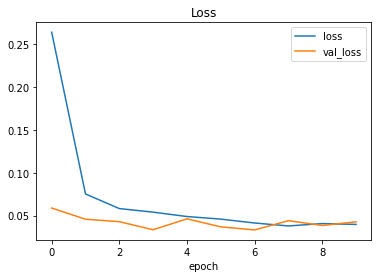

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

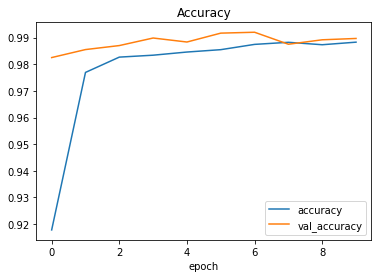

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

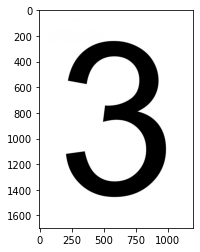

In [16]:
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

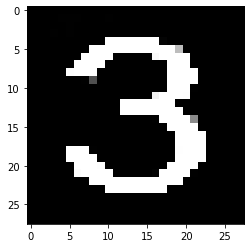

In [17]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # This will remove the depth and make the array 2-d and convert image to gray scale.
#print(gray_scale.shape)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
#print(image)

In [18]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [19]:
#prediction = model.predict_classes(image)
pred_func = model.predict(image)
prediction = np.argmax(pred_func, axis=1)
print("predicted digit:", str(prediction))

predicted digit: [3]


In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.0357055589556694
Test accuracy: 0.9886999726295471


In [28]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output) # Accessing layers from previously trained layers.
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [32]:
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


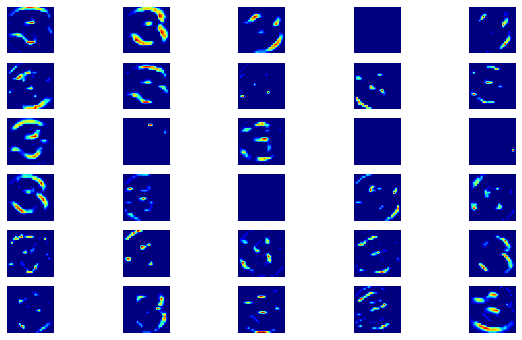

In [33]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1) # This will cycle through all our index values and place the eye plus one image at its appropriate position.
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet')) # This will ensure that our new filter is printed with each iteration of our for a loop.
  plt.axis('off')

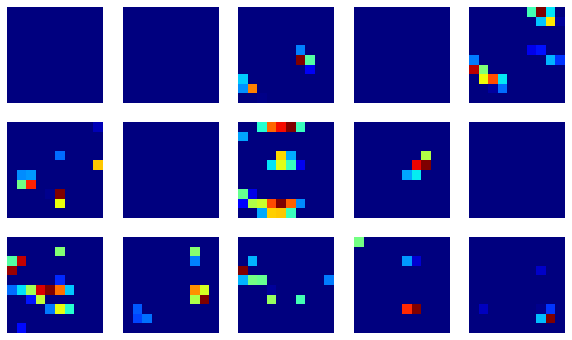

In [34]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1) # This will cycle through all our index values and place the eye plus one image at its appropriate position.
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet')) # This will ensure that our new filter is printed with each iteration of our for a loop.
  plt.axis('off')